# Why NumPy?
---
- This presentation is part of the [__Scientific Python Training Series__]
---

[Numpy](http://numpy.scipy.org/) is the fundamental library for scientific computing in Python. It contains list like objects that work like arrays, matrices, and data tables. This is how scientists typically expect data to behave. Numpy also provides linear algebra, Fourier transforms, random number generation, and tools for integrating C/C++ and Fortran code.

[Matplotlib](http://matplotlib.org/) is the reigning library for 2D (with budding support for 3D) scientific plotting in Python. It produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  Between Numpy and Matplotlib, much of MATLAB's functionality can be replaced with Python.

If you primarily want to work with tables of data, [Pandas](pandas), which depends on Numpy, is probably the module that you want to start with.

Source: Software Carpentry, http://software-carpentry.org

## Why Numpy?

Python was never designed originally for scientific computing, and contains many high-level abstractions necessary to enable its enormously flexible object-oriented interface.  In Python, storing most integers requires more than just 4-8 bytes.  It also requires at least a couple pointers per-integer.  Performing a calculation on two numbers requires one or two bytecode operations, each of which can take dozens of CPU instructions for each pass through the Python eval loop.  And when it comes to looping and index operations of Python lists the situation is even more dire.

### A basic example

`Z = A + B * C`



### Using pure Python:

In [12]:
# Create 3 lists of a million ints
A = range(1000000)
B = range(1000000)
C = range(1000000)

In [13]:
# Time doing the operation with a for loop
import time

start_time = time.time()

######
Z = []
for idx in range(len(A)):
    Z.append(A[idx] + B[idx] * C[idx])
#####

print('Took', time.time() - start_time, 'seconds')

Took 0.7373738288879395 seconds


### Using Numpy:

In [14]:
# Create 3 Numpy arrays with a million ints
import numpy as np

In [15]:
A = np.arange(1000000)
B = np.arange(1000000)
C = np.arange(1000000)

In [16]:
# Time the operation with Numpy
start_time = time.time()

#####

Z = A + B * C

#####

print('Took', time.time() - start_time, 'seconds')

Took 0.008917093276977539 seconds


### Results

In [17]:
print('Numpy is ', 0.7373738288879395  / 0.008917093276977539 , 'times faster')

Numpy is  82.69217400604262 times faster


In [ ]:
# Print the result

Z = A + B * C

print(Z)

In [ ]:
Z

In addition to just *looking* simpler, the Numpy version is significantly faster. The for loop disappears completely and is replaced by vectorized array operations.

### Memory Usage:

3 x 1000000 lists of Python ints: **96 MB**

3 x 1000000 Numpy arrays of 64-bit ints: **32 MB**

## Numpy and Matplotlib

Populating the interactive namespace from numpy and matplotlib


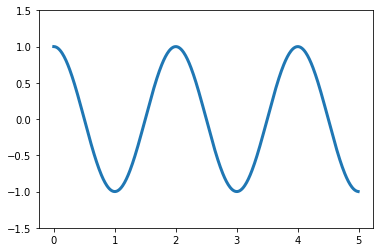

In [18]:
%pylab inline
import numpy as np

ax = subplot(111)
x = np.arange(0.0, 5.0, 0.01)
y = np.cos(x * np.pi)
lines, = plot(x, y, lw=3)
ylim(-1.5, 1.5)
show()

Unlike Python lists, __NumPy arrays are homogeneous: all values must have exactly the same type.__ This allows values to be packed together, which saves memory and is much faster to process.

If we give NumPy initial values of different types, it finds the most general type and stores all the values in the array using that type. For example, if we construct an array from an integer and a float, the array's values are both floats.